In [49]:
# 🔹 Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score


In [51]:
# 🔹 Step 2: Load the Dataset
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)

# View first few rows
print("📄 First 5 Rows of Data:")
df.head()


📄 First 5 Rows of Data:


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [53]:
# 🔹 Step 3: Basic Exploration
print("📌 Dataset Info:")
print(df.info())

print("\n📊 Summary Statistics:")
print(df.describe())

📌 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes
None

📊 Summary Statistics:
           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


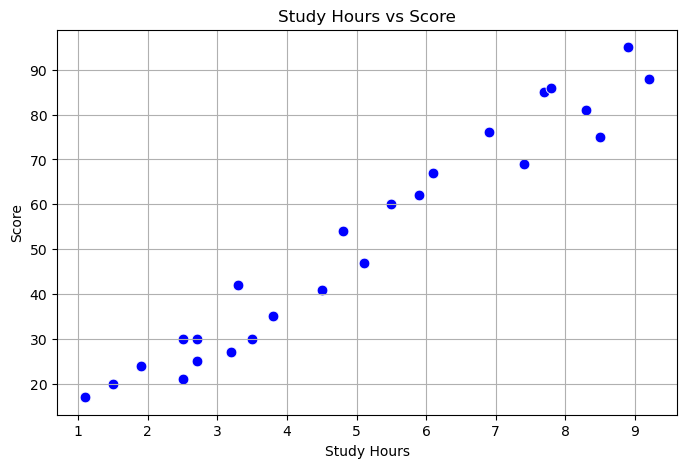

In [15]:
# 🔹 Step 4: Data Visualization
plt.figure(figsize=(8,5))
sns.scatterplot(x='Hours', y='Scores', data=df, color='blue', s=60)
plt.title('Study Hours vs Score')
plt.xlabel('Study Hours')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [55]:
# 🔹 Step 5: Data Preparation
X = df[['Hours']]  # Feature
y = df['Scores']   # Target

# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
X_train

,Hours
9,2.7
13,3.3
1,5.1
22,3.8
5,1.5
2,3.2
12,4.5
15,8.9
3,8.5
4,3.5


In [59]:
y_train

9     25
13    42
1     47
22    35
5     20
2     27
12    41
15    95
3     75
4     30
20    30
17    24
21    54
18    67
24    86
7     60
10    85
14    17
19    69
6     88
Name: Scores, dtype: int64

In [61]:
X_test

,Hours
8,8.3
16,2.5
0,2.5
23,6.9
11,5.9


In [63]:
y_test

8     81
16    30
0     21
23    76
11    62
Name: Scores, dtype: int64

In [65]:
# 🔹 Step 6: Model Training
model = LinearRegression()
model.fit(X_train, y_train)

# Print model coefficient and intercept
print(f"Model Coefficient (Slope): {model.coef_[0]}")
print(f"Model Intercept: {model.intercept_}")

Model Coefficient (Slope): 9.682078154455697
Model Intercept: 2.826892353899737


In [67]:
# 🔹 Step 7: Prediction & Evaluation
y_pred = model.predict(X_test)

# Compare Actual vs Predicted
result_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print(result_df)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\n📏 Mean Absolute Error: {mae:.2f}")
print(f"📈 R² Score: {r2:.2f}")

   Actual  Predicted
0      81  83.188141
1      30  27.032088
2      21  27.032088
3      76  69.633232
4      62  59.951153

📏 Mean Absolute Error: 3.92
📈 R² Score: 0.97


In [69]:
# 🔹 Step 8: Predicting New Value
hours = float(input("Enter number of study hours: "))
predicted_score = model.predict(np.array([[hours]]))
print(f"📘 Predicted Score: {predicted_score[0]:.2f}")

Enter number of study hours:  7


📘 Predicted Score: 70.60


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [71]:
import joblib

# Train karne ke baad model save karo
joblib.dump(model, 'score_predictor_model.pkl')


['score_predictor_model.pkl']

In [73]:
# Model load karo
model = joblib.load('score_predictor_model.pkl')

# Ab is model se prediction karo
predictions = model.predict(X_test)
